In [7]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from pathlib import Path
from math import floor
from pprint import pprint



In [8]:
file = Path('../output_data/fred_data.csv')
fred_data = pd.read_csv(file)
fred_data

,Year,Avg. 30 Year Fixed Mortgage Rate,Avg. 15 Year Fixed Mortgage Rate,Avg. Median Home Sale Price,Avg. Housing Inventory,Avg. Home Price Index,Avg. GDP (Billions of $),Avg. CPI,Avg. Unemployment Rate,Avg. Household Debt to GDP
0,1963,NaN,NaN,18050.00,NaN,NaN,637.45,31.81,5.64,NaN
1,1964,NaN,NaN,18925.00,NaN,NaN,684.46,32.30,5.16,NaN
2,1965,NaN,NaN,20125.00,NaN,NaN,742.29,32.73,4.51,NaN
3,1966,NaN,NaN,21500.00,NaN,NaN,813.41,33.55,3.79,NaN
4,1967,NaN,NaN,22750.00,NaN,NaN,859.96,34.71,3.84,NaN
...,...,...,...,...,...,...,...,...,...,...
56,2019,3.94,3.39,320250.00,1113750.0,209.45,21521.40,263.21,3.68,76.27
57,2020,3.11,2.60,336950.00,838500.0,222.12,21322.95,267.70,8.09,80.03
58,2021,2.96,2.27,396800.00,727000.0,260.06,23594.03,277.25,5.37,77.97
59,2022,5.34,4.58,457475.00,714250.0,298.52,25744.11,294.30,3.64,76.64


In [9]:
yr30_unemploy_df = fred_data[['Year','Avg. 30 Year Fixed Mortgage Rate', 'Avg. Unemployment Rate']]
yr15_unemploy_df = fred_data[['Year','Avg. 15 Year Fixed Mortgage Rate', 'Avg. Unemployment Rate']]
yr30_unemploy_df = yr30_unemploy_df.dropna()
yr15_unemploy_df = yr15_unemploy_df.dropna()

print(yr30_unemploy_df)
print(yr15_unemploy_df)

    Year  Avg. 30 Year Fixed Mortgage Rate  Avg. Unemployment Rate
8   1971                              7.54                    5.95
9   1972                              7.38                    5.60
10  1973                              8.04                    4.86
11  1974                              9.19                    5.64
12  1975                              9.05                    8.48
13  1976                              8.87                    7.70
14  1977                              8.85                    7.05
15  1978                              9.64                    6.07
16  1979                             11.20                    5.85
17  1980                             13.74                    7.18
18  1981                             16.64                    7.62
19  1982                             16.04                    9.71
20  1983                             13.24                    9.60
21  1984                             13.88                    

In [30]:
# Calculate the correlation coefficient between Avg. 15 Year Fixed Mortgage Rate and Unemployment Rate
yr30_corr_coef = yr30_unemploy_df['Avg. 30 Year Fixed Mortgage Rate'].corr(yr30_unemploy_df['Avg. Unemployment Rate'])
yr30_lin_reg=st.linregress(yr30_unemploy_df["Avg. 30 Year Fixed Mortgage Rate"],yr30_unemploy_df["Avg. Unemployment Rate"])
yr30_line_eq = "y = " + str(round(yr30_lin_reg.slope,2)) + "x +" + str(round(yr30_lin_reg.intercept,2))
print(f"Correlation Coefficient 30 yr: {yr30_corr_coef}") 
print(f"The r-squared is: {yr30_lin_reg.rvalue**2}") 
print(f"the line equation is: {yr30_line_eq}")

Correlation Coefficient 30 yr: 0.3248479866385878
The r-squared is: 0.10552621442314414
the line equation is: y = 0.16x +4.89


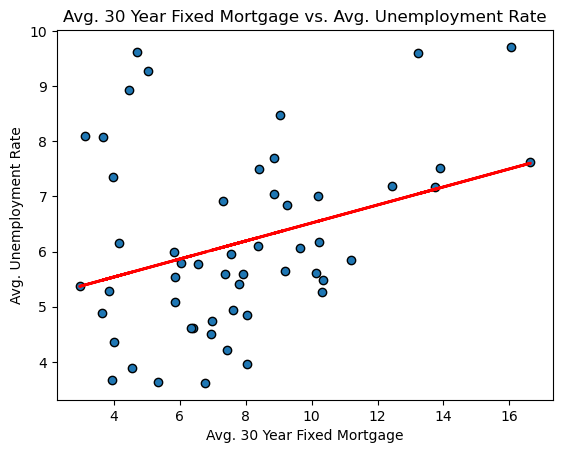

In [11]:
# Plot Avg. 30 Year Fixed Mortgage versus Avg. Home Price Index

plt.scatter(yr30_unemploy_df["Avg. 30 Year Fixed Mortgage Rate"],yr30_unemploy_df["Avg. Unemployment Rate"], edgecolor="black", marker="o")
plt.title('Avg. 30 Year Fixed Mortgage vs. Avg. Unemployment Rate')
plt.xlabel('Avg. 30 Year Fixed Mortgage')
plt.ylabel('Avg. Unemployment Rate')
y = yr30_lin_reg.slope*yr30_unemploy_df["Avg. 30 Year Fixed Mortgage Rate"]+yr30_lin_reg.intercept
plt.plot(yr30_unemploy_df["Avg. 30 Year Fixed Mortgage Rate"], y, linewidth=2, markersize=12, color="red")
plt.show()

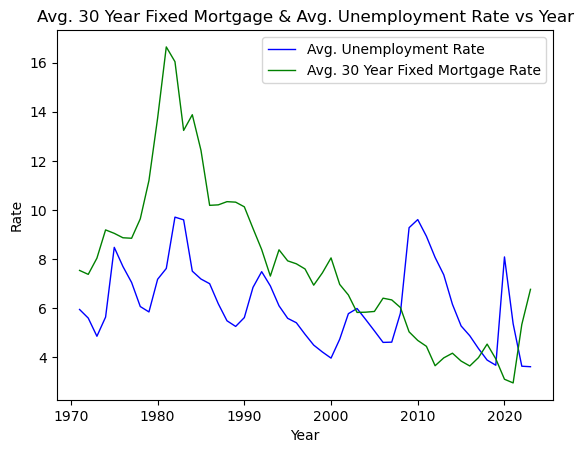

In [29]:
# Plot Avg. 15 Year Fixed Mortgage and Avg. Home Price Index vs Year
yr30_lin_reg=st.linregress(yr30_unemploy_df["Avg. 30 Year Fixed Mortgage Rate"],yr30_unemploy_df["Avg. Unemployment Rate"])
Unemployment, = plt.plot(yr30_unemploy_df["Year"],yr30_unemploy_df["Avg. Unemployment Rate"], color="blue", linewidth=1, label="Avg. Unemployment Rate" )
Rate_30_yr, = plt.plot(yr30_unemploy_df["Year"],yr30_unemploy_df["Avg. 30 Year Fixed Mortgage Rate"], color="green", linewidth=1, label="Avg. 30 Year Fixed Mortgage Rate" )
plt.title('Avg. 30 Year Fixed Mortgage & Avg. Unemployment Rate vs Year')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.legend(handles=[Unemployment, Rate_30_yr], loc="best")
plt.show()